<a href="https://colab.research.google.com/github/tariqzia5/ML-Project-Bank-Loan-marketing/blob/main/Bank_Loan_marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Data Link:https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling?datasetId=48024&sortBy=voteCount




- This case is about a bank (Thera Bank).

- Majority of the customers are liability customers (depositors) with varying size of deposits. 

- The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans.

- In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).
 
# DATA DISCRIPTION
1. **ID:** Customer ID
2. **Age:** Customer's age in completed years.
3. **Experience:** Number of years of professional experience.
4. **Income:** Annual income of the customer (\$000).
5. **ZIPCode:** Home Address ZIP code.
6. **Family:** Family size of the customer.
7. **CCAvg:** Avg. spending on credit cards per month (\$000).
8. **Education:** Education Level of the customer. Here 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
9. **Mortgage:** Value of house mortgage if any(\$000).
10. **Personal Loan:** Did this customer accept the personal loan offered in the last campaign?.
11. **Securities Account:** Does the customer have a securities account with the bank?  
12. **CD Account:** Does the customer have a certificate of deposit (CD) account with the bank?
13. **Online:** Does the customer use internet banking facilities?
14. **CreditCard:** Does the customer uses a credit card issued by UniversalBank?

#Problem Objective 
We will build a model which will identify the potential custormers amongst the existing liabilty customers who has higher chances of taking the loan.


#Data Exploration and Validation


In [ ]:
# importing the packages required
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
# Data source
url = 'https://raw.githubusercontent.com/tariqzia5/ML-Project-Bank-Loan-marketing/main/Bank_Personal_Loan_Modelling_data.xlsx?raw=true'

In [15]:
# Importing the data
data1 = pd.read_excel(url)

In [16]:
data1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


**NOTE:**

Personal loan is the target variable.

In [ ]:
# Getting a general information of the data 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Number of rows and columns
data1.shape

(5000, 14)

In [ ]:
# column valyes
data1.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'], dtype=object)

In [ ]:
#variable format
data1.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**OBSERVATION:**


1.Data has 13 variables and 5000 observations

2.There is no null value.

3.There is only one variable with float values and the rest are integers.







In [ ]:
# Observing the first 10 observations
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Identifying any unique identifier
data1.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'], dtype=object)

**Here ID is the unique identifier.**

In [ ]:
# What are the categorical and discrete variables?
print(data1.dtypes)
data1.head()

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



**Categorical variables:**
1. ZIP code
2. Family
3. Education
4. Personal loan
5. Securities account
6. CD account
7. Online
8. Credit card 

**Continous variables:**
1. Age
2. Experience
3. CCAvg
4. Mortgage
5. Income

**NOTE:** The ID variable will be ignored in data exploration and data cleaning stage as it is not useful in model building.
# Categorical variable exploration

## 1. ZIP Code

**NOTE:**
This variable is not useful in building the model.
And hence variable exploration is not necessary.


## 2. Family

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


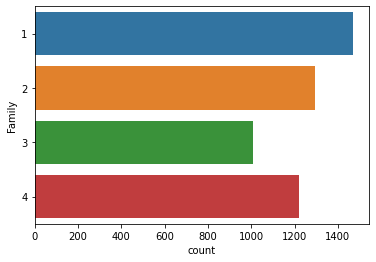

In [ ]:
# Counting the value's in the family variable.
print(data1['Family'].value_counts())

# Plotting the count plot
sns.countplot(y = "Family" , data = data1)

**Observations:**

- The variable Family is the number of dependent members in the customers family.

- This variable takes value's of 1,2,3 and 4.

- No outlier detection.

- No null value.

- Customers with only one family member is maximum.

- This variable is clean.



## 3. Education

1    2096
3    1501
2    1403
Name: Education, dtype: int64


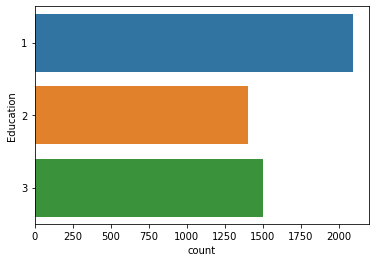

In [ ]:
# Counting the value's in the Education variable.
print(data1['Education'].value_counts())

# Plotting the count plot
sns.countplot(y = "Education" , data = data1)

**Observation:**

- Education take value's of 1,2 or 3.

- 1 for Under graduate, 2 Graduate and 3 for post graduate.

- All the values in the data takes one of these three posibble value.

- No outlier detection.

- No null vlaue.

- Customers who are under graduate is more in number.

- This variable is clean.


## 4. Personal Loan

0    4520
1     480
Name: Personal Loan, dtype: int64


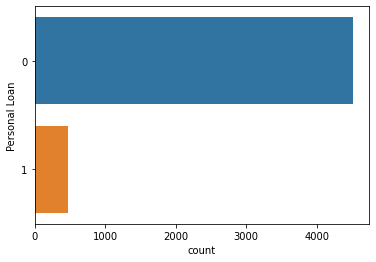

In [ ]:
# Counting the value's in the Personal loan variable.
print(data1['Personal Loan'].value_counts())

# Plotting the count plot
sns.countplot(y = "Personal Loan" , data = data1)

**Observation:**

- The variable personal loan take two value's 0 and 1.

- 0 indicating that the customer did not accept the personal loan offererd in the last campaign. and 1 indicates that the customer acceoted the  personal loan offered in the last campaign.

- There is no null value.

- No outlier detection.

- This variable is clean.

- The variable is highly imbalanced. That is the class 0 vlaue's dominates  over class 1 value's.

In [ ]:
data = data1 # creating a copy of the dataframe so that the origianl data is not lost

**NOTE:** 

`data1` is the original dataset.

In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
data.rename(columns = {"Personal Loan": "Personal_Loan"}, inplace = True) # Renaming the 'Personal Loan' column to 'Personal_Loan'

In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## 5. Securities Account

0    4478
1     522
Name: Securities Account, dtype: int64


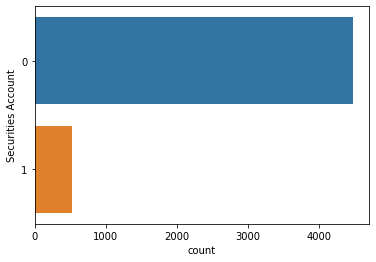

In [ ]:
# Counting the value's in the Securities Account variable.
print(data['Securities Account'].value_counts())

# Plotting a countplot.
sns.countplot(y = "Securities Account" , data = data)

**Observation:**

- The Securities account variable takes two values namely, 0 and 1.

- 0 indicating that the customer do not have a security account with the bank. And 1 indicating that the customer has security account with the bank.

- Customers who has a security account with the bank are less in number.

- The is no null value.

- There is no outlier detection

- This variable is clean.

In [ ]:
data.rename(columns = {'Securities Account': 'Securities_Account'},inplace = True) # Renaming the Securities account column.

In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## 6. CD account

0    4698
1     302
Name: CD Account, dtype: int64


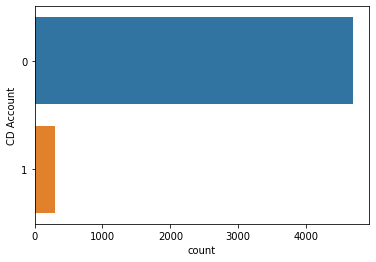

In [ ]:
# Counting the value's in the CD Account variable.
print(data['CD Account'].value_counts())

#  Plotting the count plot.
sns.countplot(y = "CD Account" , data = data)

**Observation:**

- The variable CD account takes two value's namely 0 and 1.

- 0 indicates that the customer do not have a Cetificate of Deposit(CD) account with the bank and 1 indicates that the customer has a certificate of deposit(CD) account with the bank.

- The customers who has CD account are few in number.

- No null value's.

- No outlier detection.

- This variable is clean.

In [ ]:
data.rename(columns = {'CD Account': 'CD_Account'}, inplace = True) # Renaming the CD Account column.

In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## 7. Online

1    2984
0    2016
Name: Online, dtype: int64


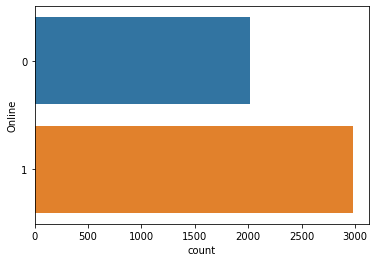

In [ ]:
# Counting the value's in the Online variable.
print(data['Online'].value_counts())
sns.countplot(y = "Online" , data = data)

**Observation:**

- The variable online takes two value's namely 0 and 1.

- 0 indicates that the customer do not use internet banking facility and 1 indicates that the customer uses the internet banking facility.

- A large number of customers uses the internet banking facility.

- No null value's.

- No outlier detection.

- This variable is clean.

## 8. Credit card

0    3530
1    1470
Name: CreditCard, dtype: int64


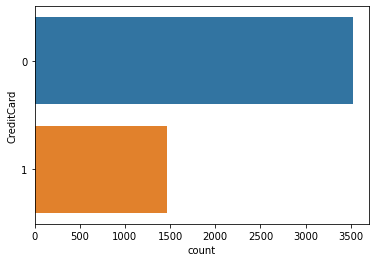

In [ ]:
# Counting the value's in the Credit card variable.
print(data['CreditCard'].value_counts())

# Plotting the countplot.
sns.countplot(y = "CreditCard" , data = data)

**Observation:**

- The variable credit card takes two value's namely 0 and 1.

- 0 indicates that the customer do not use a credit card issued by Universal bank and 1 indicates that the customer uses a credit card issued by Universal bank.

- No null value's.

- No outlier detection.

- This variable is clean.

# Continous variable exploration

## 1. CCAvg

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c25b7e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c25bd950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c25b78d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c25c3450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c25c3990>],
 'means': []}

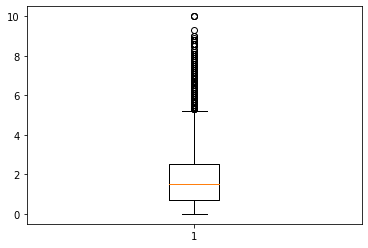

In [ ]:
# Creating boxplot
plt.boxplot(data['CCAvg'])

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

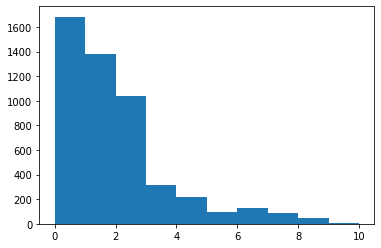

In [ ]:
# Creating histogram
plt.hist(data['CCAvg'])

In [ ]:
percentiles = data["CCAvg"].quantile([0.01,0.05,0.15,0.25,0.35,0.45,0.50,0.55,0.60,0.65,0.75,0.80,0.85,0.90,0.905,0.91,0.92,0.93,0.931,0.935,0.94,0.95,0.96,0.97,0.98,0.99,0.995,0.999, 1])
percentiles

0.010     0.0
0.050     0.1
0.150     0.4
0.250     0.7
0.350     1.0
0.450     1.4
0.500     1.5
0.550     1.7
0.600     1.9
0.650     2.1
0.750     2.5
0.800     2.8
0.850     3.4
0.900     4.3
0.905     4.4
0.910     4.5
0.920     4.7
0.930     5.0
0.931     5.1
0.935     5.2
0.940     5.5
0.950     6.0
0.960     6.4
0.970     6.8
0.980     7.3
0.990     8.0
0.995     8.5
0.999     9.0
1.000    10.0
Name: CCAvg, dtype: float64

**Observation:**

- CCAvg (Average credit card spending in 000\$) lies in the range 0$ to 10,000\$.

- From the boxpolot it is clear there is presence of outlier in CCAvg variable.

- This variable needs cleaning.



## 2. Mortgage

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c24c5e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c24c9910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c24c5910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c24d0410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c24d0950>],
 'means': []}

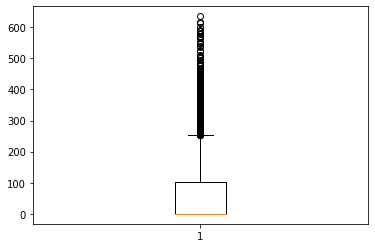

In [ ]:
# Creating boxplot
plt.boxplot(data['Mortgage'])

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

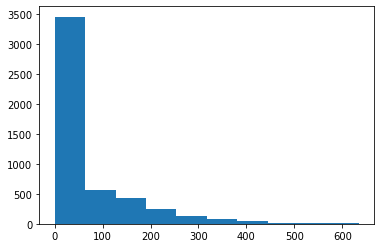

In [ ]:
# Creating histogram
plt.hist(data["Mortgage"])

In [ ]:
percentiles = data["Mortgage"].quantile([0.01,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.90,0.92, 0.93,0.94,0.941,0.942,0.943, 0.944 ,0.945,0.95,0.97,0.98,0.99 ,1])
percentiles

0.010      0.000
0.050      0.000
0.150      0.000
0.250      0.000
0.350      0.000
0.450      0.000
0.550      0.000
0.650      0.000
0.750    101.000
0.850    155.000
0.900    200.000
0.920    222.080
0.930    236.000
0.940    250.000
0.941    251.000
0.942    253.116
0.943    256.000
0.944    257.000
0.945    260.000
0.950    272.000
0.970    325.030
0.980    366.040
0.990    431.010
1.000    635.000
Name: Mortgage, dtype: float64

**Observation:**

- From the boxplot it can be observed that there is presence of outliers.

- 65% of the data takes 0 value and the rest of the 45% takes comparatively very large values.

- In this variable imputation is not a good choice for cleaning.

- So we will create a new flag variable with 0 indicating that the customer have not taken any house mortgage and 1 if the customer has taken a house mortgage . We will drop the original variable.



## 3. Income

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c23c8890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c23cc350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c23c8350>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c23cce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c23d5390>],
 'means': []}

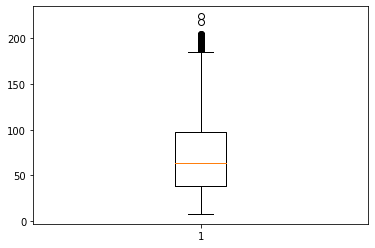

In [ ]:
# Creating boxplot
plt.boxplot(data["Income"])

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <a list of 10 Patch objects>)

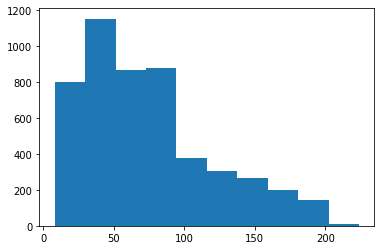

In [ ]:
# Creating histogram
plt.hist(data["Income"])

In [ ]:
percentiles = data["Income"].quantile([0.01,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.95,0.96,0.97,0.98,0.99,1])
percentiles

0.01     10.00
0.05     18.00
0.15     29.00
0.25     39.00
0.35     45.00
0.45     59.00
0.55     71.00
0.65     82.00
0.75     98.00
0.80    113.00
0.85    128.00
0.90    145.00
0.91    150.00
0.92    154.00
0.93    159.00
0.94    163.06
0.95    170.00
0.95    170.00
0.96    175.00
0.97    180.03
0.98    185.00
0.99    193.00
1.00    224.00
Name: Income, dtype: float64

**Observations:**

- From the boxplot it is clear that there is presence of outliers.

- This variable needs cleaning.

## 4. Age

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c22adf90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c22b4a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c22ada50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c22bb550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c22bba90>],
 'means': []}

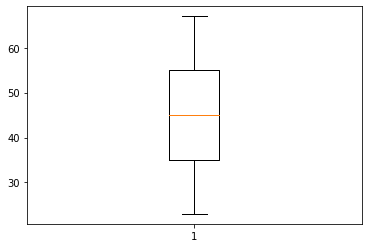

In [ ]:
# Creating boxplot
plt.boxplot(data['Age'])

(array([262., 487., 632., 479., 532., 600., 524., 678., 504., 302.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <a list of 10 Patch objects>)

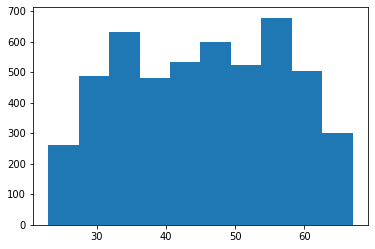

In [ ]:
# Creating histogram
plt.hist(data["Age"])

In [ ]:
percentiles = data["Age"].quantile([0.01,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.95,0.96,0.97,0.98,0.99,1])
percentiles

0.01    25.0
0.05    27.0
0.15    32.0
0.25    35.0
0.35    40.0
0.45    43.0
0.55    47.0
0.65    51.0
0.75    55.0
0.80    57.0
0.85    59.0
0.90    61.0
0.91    61.0
0.92    62.0
0.93    62.0
0.94    63.0
0.95    63.0
0.95    63.0
0.96    63.0
0.97    64.0
0.98    65.0
0.99    65.0
1.00    67.0
Name: Age, dtype: float64


**OBSERVATION:**

- All the bank customers will be of age equal to or above 18.

- Minimum value of age to get a personal loan is 18.

- Hence, Age variable lies in the range [18,100], with 100 being the extreme case.

- All the value's lies within in this range.

- There is no outlier detection.

- This variable is clean.

## 5. Experience

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c24fad50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c2603d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c24a4150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c25df150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c24d0190>],
 'means': []}

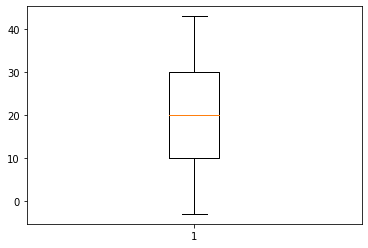

In [ ]:
# Creating boxplot
plt.boxplot(data['Experience'])

(array([192., 592., 505., 581., 524., 660., 663., 501., 586., 196.]),
 array([-3. ,  1.6,  6.2, 10.8, 15.4, 20. , 24.6, 29.2, 33.8, 38.4, 43. ]),
 <a list of 10 Patch objects>)

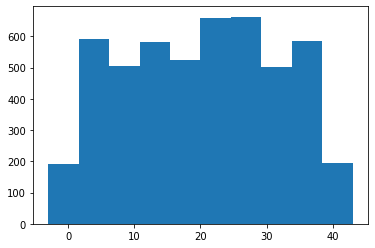

In [ ]:
# Creating histogram
plt.hist(data["Experience"])

In [ ]:
percentiles = data["Experience"].quantile([0.01,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.95,0.96,0.97,0.98,0.99,1])
percentiles

0.01    -1.00
0.05     2.00
0.15     6.00
0.25    10.00
0.35    14.00
0.45    18.00
0.55    22.00
0.65    26.00
0.75    30.00
0.80    32.00
0.85    34.00
0.90    36.00
0.91    36.00
0.92    36.08
0.93    37.00
0.94    37.00
0.95    38.00
0.95    38.00
0.96    38.00
0.97    39.00
0.98    40.00
0.99    41.00
1.00    43.00
Name: Experience, dtype: float64

**Observations:**

- The variable experience is in years and it can only take positive integers.


- But the data has some negetive values.

- These value's needs to be treated.

- The range for the Experience value is [0,60].

- We are taking the max range value as 60 because 60 is the retirement age.

- There are some negetive values in the data and there value's needs to be cleaned.

- No null value.




#Data Cleaning and Data Preparation


## Categorical Variable Cleaning

All the categorical variables are clean.

## Continous Variable Cleaning

### 1. Experiance variable.

The Experience variable has negetive values.

In [ ]:
# Counting the number of entries with negetive value.
mask = data["Experience"]<0
data["Experience"][mask].count()

52

There are 52 records with negetive values.

In [ ]:
# Finding the average of the non negetive entries.
mask1 = data["Experience"]>0
median = data["Experience"][mask1].median()

In [ ]:
# replacing the negetive entries with the median value.

data["Experience_new"] = data["Experience"]
data["Experience_new"][mask] = median


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Rechecking the Experience_new variable for negetive value's.

data["Experience_new"][data["Experience_new"]<0].count()

0

### 2. CCAvg variable.

**Applying log transformation**

In [ ]:
import numpy as np
data["log_CCAvg"] = np.log(data["CCAvg"] + 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c20f3490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c20f3f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c20ecf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c20fba10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c20fbf50>],
 'means': []}

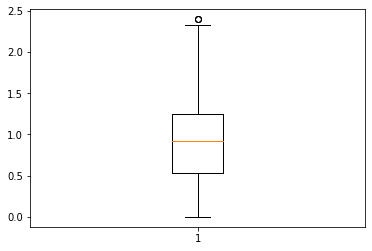

In [ ]:
plt.boxplot(data["log_CCAvg"])

We can see that after applying log transformation there are no otliers in the data.

In [ ]:
data["log_CCAvg"].mean()

0.9293451780170995

In [ ]:
data["log_CCAvg"].median()

0.9162907318741551

### 3. Mortgage variable.

In [ ]:
# Initiating  a new zero column for flag variable.
data["Mortgage_flag"] = 0
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,log_CCAvg,Mortgage_flag
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,0.955511,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,19,0.916291,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,15,0.693147,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,9,1.308333,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,8,0.693147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,3,1.064711,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,4,0.336472,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,39,0.262364,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,40,0.405465,0


In [ ]:
mask3 = data["Mortgage"]>0
data["Mortgage_flag"][mask3] = 1 
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,log_CCAvg,Mortgage_flag
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,0.955511,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,19,0.916291,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,15,0.693147,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,9,1.308333,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,8,0.693147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,3,1.064711,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,4,0.336472,1
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,39,0.262364,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,40,0.405465,0


### 4. Income variable

In [ ]:
data["sqrt_income"] = np.sqrt(data["Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6c2064e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6c206a910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6c2064910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6c2071410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6c2071950>],
 'means': []}

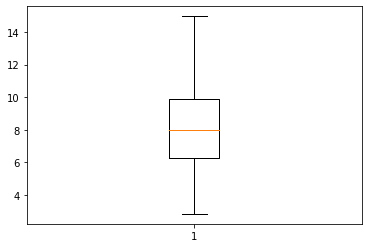

In [ ]:
plt.boxplot(data["sqrt_income"])

We can observe that after applying square root transformation, there is outliers in the data.

In [ ]:
data["sqrt_income"].mean()

8.16622070958749

In [ ]:
data["sqrt_income"].median()

8.0

**Removal of columns that are not used in model building**

Since we made new columns for the cleaned data, we will create a new data frame with only the cleaned columns that we will later use to build the model.

We will  remove the ID and ZIP code variable as it is clear from the business background that the ID doesn't contribute in prediction.

In [ ]:
data_new = data.drop(['CCAvg' , 'Mortgage'  , 'Experience' , 'Income' , "ID" , "ZIP Code"] , axis = 1)
data_new

,Age,Family,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,log_CCAvg,Mortgage_flag,sqrt_income
0,25,4,1,0,1,0,0,0,1,0.955511,0,7.000000
1,45,3,1,0,1,0,0,0,19,0.916291,0,5.830952
2,39,1,1,0,0,0,0,0,15,0.693147,0,3.316625
3,35,1,2,0,0,0,0,0,9,1.308333,0,10.000000
4,35,4,2,0,0,0,0,1,8,0.693147,0,6.708204
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,1,3,0,0,0,1,0,3,1.064711,0,6.324555
4996,30,4,1,0,0,0,1,0,4,0.336472,1,3.872983
4997,63,2,3,0,0,0,0,0,39,0.262364,0,4.898979
4998,65,3,2,0,0,0,1,0,40,0.405465,0,7.000000


In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,log_CCAvg,Mortgage_flag,sqrt_income
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,0.955511,0,7.000000
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,19,0.916291,0,5.830952
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,15,0.693147,0,3.316625
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,9,1.308333,0,10.000000
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,8,0.693147,0,6.708204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,3,1.064711,0,6.324555
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,4,0.336472,1,3.872983
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,39,0.262364,0,4.898979
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,40,0.405465,0,7.000000


#Model Building 


## Logistic Regression Model

Since the target variable takes value's of 0's and 1's, hence logistic regression model is used.

In [ ]:
data_new

,Age,Family,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,log_CCAvg,Mortgage_flag,sqrt_income
0,25,4,1,0,1,0,0,0,1,0.955511,0,7.000000
1,45,3,1,0,1,0,0,0,19,0.916291,0,5.830952
2,39,1,1,0,0,0,0,0,15,0.693147,0,3.316625
3,35,1,2,0,0,0,0,0,9,1.308333,0,10.000000
4,35,4,2,0,0,0,0,1,8,0.693147,0,6.708204
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,1,3,0,0,0,1,0,3,1.064711,0,6.324555
4996,30,4,1,0,0,0,1,0,4,0.336472,1,3.872983
4997,63,2,3,0,0,0,0,0,39,0.262364,0,4.898979
4998,65,3,2,0,0,0,1,0,40,0.405465,0,7.000000


In [ ]:
X = data_new.drop(["Personal_Loan"],axis = 1)
y = data_new["Personal_Loan"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logistic = LogisticRegression()
logistic.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic.intercept_)
print("coefficients = \n " , logistic.coef_)

Intercept = [-11.97894586]
coefficients = 
  [[-0.13204128  0.67737027  1.19252037 -2.83872354  4.84170837 -0.38600637
  -1.93190125  0.12737835  0.55550791  0.09567731  0.87978018]]


In [ ]:
# calculating the accuracy of the model on train data
import numpy as np
from sklearn.metrics import confusion_matrix

predict = logistic.predict(X)
cm = confusion_matrix(y,predict)
print("COnfusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Overall accuracy on train data for all the variables = " , accuracy)

COnfusion matrix = 
 [[4459   61]
 [ 191  289]]
Overall accuracy on train data for all the variables =  0.9496


**Checking the p value of the variables to find the impactful and non impactful variables.**

A variable is impactful if the p value is $<$0.05 and non impactful if the p value is $\ge$ 0.05.

In [ ]:
# Checking the p value for individual impact of the variables on the targe variable.
import statsmodels.api as sm
sm = sm.Logit(y,X)
sm.fit()
print(sm.fit().summary())

Optimization terminated successfully.
         Current function value: 0.197182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197182
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:                  0.3764
Time:                        17:53:15   Log-Likelihood:                -985.91
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                1.855e-249
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

We can see that the p value of Family and Mortgage variable is $\ge$ 0.05 which indicates that the variables are not impactful.

However before removing these variables we will first check the VIF(variable inflation factor) for multicollinearity between variables, as if there is any multicollinearity between variables it will have impact on the p value.


**VIF**

If VIF $>5$ for any two or more variables, then it is a clear case of multicollinearity between those variables.

In [ ]:
# Defining user defined function for Variation Inflation Factor
def vif_cal(input_data,dependent_col):
  import statsmodels.formula.api as sm
  x_vars=input_data.drop([dependent_col], axis=1)
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]] 
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
    vif=round(1/(1-rsq),2)
    print (xvar_names[i], " VIF = " , vif)

In [ ]:
# Calculating VIF
vif_cal(data_new,"Personal_Loan")

Age  VIF =  20.91
Family  VIF =  1.03
Education  VIF =  1.05
Securities_Account  VIF =  1.14
CD_Account  VIF =  1.32
Online  VIF =  1.04
CreditCard  VIF =  1.11
Experience_new  VIF =  20.87
log_CCAvg  VIF =  1.59
Mortgage_flag  VIF =  1.0
sqrt_income  VIF =  1.67


We can see that VIF of Age variable and Experinece variable is $>$5 which shows a clear case of multicollinearity.

We will first remove variable with highest VIf  and rebuild the model.


In [ ]:
X = data_new.drop(["Personal_Loan" , "Age"],axis = 1)
y = data_new["Personal_Loan"]

In [ ]:
logistic = LogisticRegression()
logistic.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic.intercept_)
print("coefficients = \n " , logistic.coef_)

Intercept = [-19.34556192]
coefficients = 
  [[ 0.67642199  1.56640796 -1.62313023  3.58301768 -0.82669608 -0.90543239
   0.00987007  0.66970329  0.14976005  1.15002667]]


In [ ]:
# calculating the accuracy of the model on train data
import numpy as np
from sklearn.metrics import confusion_matrix

predict = logistic.predict(X)
cm = confusion_matrix(y,predict)
print("COnfusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Overall accuracy on train data for all the variables = " , accuracy)

COnfusion matrix = 
 [[4453   67]
 [ 172  308]]
Overall accuracy on train data for all the variables =  0.9522


In [ ]:
# Rechecking the p value of the variables
import statsmodels.api as sm
sm = sm.Logit(y,X)
sm.fit()
print(sm.fit().summary())

Optimization terminated successfully.
         Current function value: 0.284851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284851
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4990
Method:                           MLE   Df Model:                            9
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:                 0.09915
Time:                        17:53:15   Log-Likelihood:                -1424.3
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.512e-62
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

We can observe that now the p value of all the variables is $<$0.05.

We will once again check the multicollinearity of the variables.

In [ ]:
# Calculating VIF
vif_cal(data_new.drop(["Age"] , axis = 1),"Personal_Loan")

Family  VIF =  1.03
Education  VIF =  1.04
Securities_Account  VIF =  1.14
CD_Account  VIF =  1.32
Online  VIF =  1.04
CreditCard  VIF =  1.11
Experience_new  VIF =  1.01
log_CCAvg  VIF =  1.59
Mortgage_flag  VIF =  1.0
sqrt_income  VIF =  1.67


Now we can see that the VIF of all the variables is $<$5. Hence there is no multicollinearity between the variables.

## Decision Tree

In [ ]:
X = data_new.drop(["Personal_Loan"] , axis = 1)
y = data_new["Personal_Loan"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Building a Decision Tree model
Dtree= DecisionTreeClassifier(max_depth = 2)
Dtree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

|--- sqrt_income <= 10.65
|   |--- log_CCAvg <= 1.37
|   |   |--- class: 0
|   |--- log_CCAvg >  1.37
|   |   |--- class: 0
|--- sqrt_income >  10.65
|   |--- Education <= 1.50
|   |   |--- class: 0
|   |--- Education >  1.50
|   |   |--- class: 1



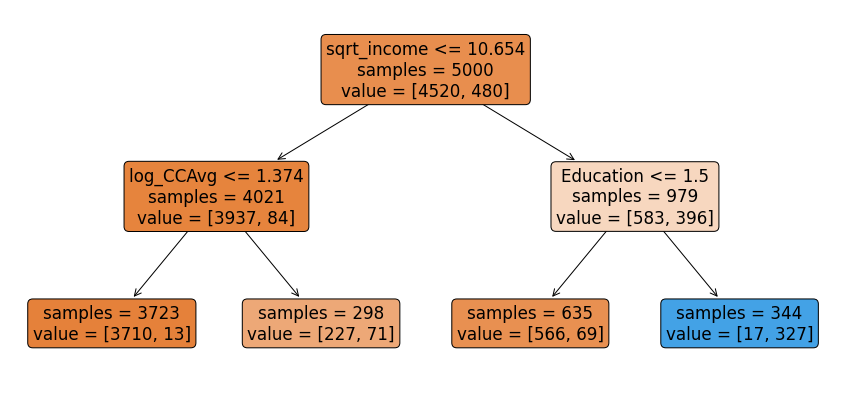

In [ ]:
# Plotting the tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree , filled = True , rounded = True , impurity = False  , feature_names = list(X.columns))
print(export_text(Dtree , feature_names = list(X.columns)))
plt.show()

In [ ]:
# Finding the accuracy of the model
predict = Dtree.predict(X)

cm = confusion_matrix(y,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model = " , accuracy)

[[4503   17]
 [ 153  327]]
Accuracy of the decision tree model =  0.966


**The problem of overfitting**

When really large tree is build ,  the model is very likely to be overfitted.
Overfitted model means that the train accuracy is very large whereas the test accuracy is considerably very low.
If the train and test accuracy differ by more than 5 points then the model is considered as overfitted model.

In [ ]:
X = data_new.drop(["Personal_Loan"] , axis = 1)
y = data_new["Personal_Loan"]


# Creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state = 22)

In [ ]:
# training the model
from sklearn import tree
Dtree1 = tree.DecisionTreeClassifier(max_depth = 1) 
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

|--- sqrt_income <= 10.65
|   |--- class: 0
|--- sqrt_income >  10.65
|   |--- class: 0



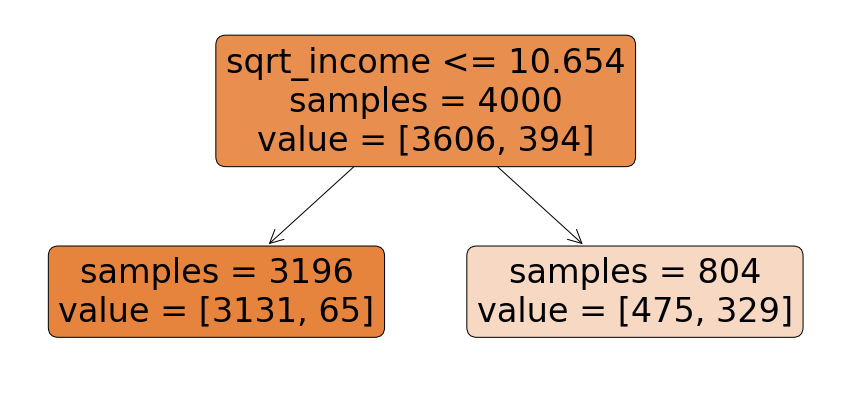

In [ ]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree1, filled = True , rounded = True , impurity = False , feature_names = list(X.columns))
print( export_text(Dtree1, feature_names =list(X.columns)))


In [ ]:
# Finding the accuracy of the model on train data
predict = Dtree.predict(X_train)

cm = confusion_matrix(y_train,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

[[3591   15]
 [ 124  270]]
Accuracy of the  model on train data=  0.96525


In [ ]:
# Finding the accuracy of the model on test data
predict = Dtree.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

[[912   2]
 [ 29  57]]
Accuracy of the decision tree model on test data =  0.969


Here we can observe that the train and test accuracy are close enough. Hence the model is not overfitted.

## Model Selection And Cross Validation

### Sensitivity And Specificity-Logistic Model

In [ ]:
X = data_new.drop(["Personal_Loan"] , axis = 1)
y = data_new["Personal_Loan"]

In [ ]:
logistic = LogisticRegression()
logistic.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicting the if a person takes personal loan or not using logistic fit.
prediction_probability = logistic.predict_proba(X)

In [ ]:
prediction_probability[: , 1]

array([6.10838999e-04, 7.66837171e-05, 4.33985836e-05, ...,
       2.62062407e-03, 6.35808574e-03, 2.68291296e-03])

In [ ]:
# Prediction for threshold = 0.5
threshold = 0.5
predict = [0 if x < threshold else 1 for x in list(prediction_probability[: , 1])]
predict[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
cm = confusion_matrix(y,predict)
print("Confusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / (total)
print("Overall accuracy = " , accuracy)

sensitivity = (cm[0,0]) / total
print("Sensitivity = " , sensitivity)

specificity = cm[1,1] / (total)
print("Specificty = " , specificity)

Confusion matrix = 
 [[4459   61]
 [ 191  289]]
Overall accuracy =  0.9496
Sensitivity =  0.8918
Specificty =  0.0578


### Threshold


Sensitivity and Specificity with different thresholds

In [ ]:
# Prediction for threshold 
threshold1 = 0.2
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

sensitivity1 = (cm1[0,0]) / total1
print("Sensitivity = " , sensitivity1)

specificity1 = cm1[1,1] / (total1)
print("Specificty = " , specificity1)

Confusion matrix = 
 [[4214  306]
 [  92  388]]
Overall accuracy =  0.9496
Sensitivity =  0.8428
Specificty =  0.0776


As threshold is decreases from 0.5 to 0.2, the sensitivity decreases(class 0 accuracy) and the specificity increases(class 1 accuracy).

In [ ]:
# Prediction for threshold 
threshold1 = 0.8
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

sensitivity1 = (cm1[0,0]) / total1
print("Sensitivity = " , sensitivity1)

specificity1 = cm1[1,1] / (total1)
print("Specificty = " , specificity1)

Confusion matrix = 
 [[4509   11]
 [ 311  169]]
Overall accuracy =  0.9496
Sensitivity =  0.9018
Specificty =  0.0338


As threshold increases from 0.5 to 0.8, the sensitivity (class 0 accuracy) increases and specificity(class 1 accuracy) decreases.

### Precision, Recall and F1 score

In [ ]:
 # Calculating precision, recall and F1 score
threshold1 = 0.5
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

Precision_class0 = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print("Precision of class 0 = " , Precision_class0)

Precision_class1 = cm1[1,1] / (cm1[0,1] + cm1[1,1])
print("Precision of class 1 = " , Precision_class1)

Recall_class0 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print("Recall of class 0 = " , Recall_class0)

Recall_class1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print("Recall of class 1 = " , Recall_class1)


F1_Class1 = 2 / ((1/Precision_class1) + (1 / Recall_class1))
print("F1 Score of class 1 = " , F1_Class1)

Confusion matrix = 
 [[4459   61]
 [ 191  289]]
Overall accuracy =  0.9496
Precision of class 0 =  0.9589247311827958
Precision of class 1 =  0.8257142857142857
Recall of class 0 =  0.9865044247787611
Recall of class 1 =  0.6020833333333333
F1 Score of class 1 =  0.6963855421686747


### Handling Class Imbalance


In [ ]:
# Value count of the target variable
freq = data_new["Personal_Loan"].value_counts()
print(freq)
print((freq / (freq.sum()))*100)


0    4520
1     480
Name: Personal_Loan, dtype: int64
0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


We can observe that 90.4% of the personal loan takes value 0 and only 9% of the values are 1.

This is clearly an imbalanced data.

To balance this data we will do undersampling of the class 0 and oversampling of class1.

In [ ]:
# Creating balanced data
mask1 = data_new["Personal_Loan"] == 0
mask2 = data_new["Personal_Loan"] == 1
PL_class0 = data_new[mask1]
PL_class1 = data_new[mask2]
PL_class0_US = PL_class0.sample(int(0.6 * len(PL_class0))) # undersampling of class 0
PL_class1_OS = PL_class1.sample(int(3 * len(PL_class1)) , replace = True)   # Oversampling of class 1

data_balanced = pd.concat([PL_class0_US , PL_class1_OS])
print("Final balanced data shape" , data_balanced.shape)



Final balanced data shape (4152, 12)


In [ ]:

# Frequency count of the balanced data
freq = data_balanced["Personal_Loan"].value_counts()
print(freq)
print((freq / (sum(freq))) * 100)

0    2712
1    1440
Name: Personal_Loan, dtype: int64
0    65.317919
1    34.682081
Name: Personal_Loan, dtype: float64


### Logistic Regression On Balanced Data

In [ ]:
X = data_balanced.drop(["Personal_Loan"],axis = 1)
y = data_balanced["Personal_Loan"]

In [ ]:
logistic = LogisticRegression()
logistic.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Updated Sensitivity And Specificity**

In [ ]:
# Predicting the if a person takes personal loan or not using logistic fit.
# Predicting the if a person takes personal loan or not using logistic fit.
prediction_probability = logistic.predict_proba(X)


threshold = 0.5
predict = [0 if x < threshold else 1 for x in list(prediction_probability[: , 1])]
predict[0:10]


cm = confusion_matrix(y,predict)
print("Confusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / (total)
print("Overall accuracy = " , accuracy)

sensitivity = (cm[0,0]) / total
print("Sensitivity = " , sensitivity)

specificity = cm[1,1] / (total)
print("Specificty = " , specificity)

Confusion matrix = 
 [[2519  193]
 [ 230 1210]]
Overall accuracy =  0.898121387283237
Sensitivity =  0.6066955684007708
Specificty =  0.29142581888246627


**Updated Precision, Recall and F1 Score**

In [ ]:
 # Calculating precision, recall and F1 score
threshold1 = 0.5
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

Precision_class0 = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print("Precision of class 0 = " , Precision_class0)

Precision_class1 = cm1[1,1] / (cm1[0,1] + cm1[1,1])
print("Precision of class 1 = " , Precision_class1)

Recall_class0 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print("Recall of class 0 = " , Recall_class0)

Recall_class1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print("Recall of class 1 = " , Recall_class1)


F1_Class1 = 2 / ((1/Precision_class1) + (1 / Recall_class1))
print("F1 Score of class 1 = " , F1_Class1)


Confusion matrix = 
 [[2519  193]
 [ 230 1210]]
Overall accuracy =  0.898121387283237
Precision of class 0 =  0.9163332120771189
Precision of class 1 =  0.8624376336421953
Recall of class 0 =  0.928834808259587
Recall of class 1 =  0.8402777777777778
F1 Score of class 1 =  0.8512135068589518


### Decision Tree on Balanced Data

In [ ]:
X = data_balanced.drop(["Personal_Loan"] , axis = 1)
y = data_balanced["Personal_Loan"]

In [ ]:
Dtree= DecisionTreeClassifier(max_depth = 2)
Dtree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

|--- sqrt_income <= 9.92
|   |--- log_CCAvg <= 1.37
|   |   |--- class: 0
|   |--- log_CCAvg >  1.37
|   |   |--- class: 0
|--- sqrt_income >  9.92
|   |--- Education <= 1.50
|   |   |--- class: 0
|   |--- Education >  1.50
|   |   |--- class: 1



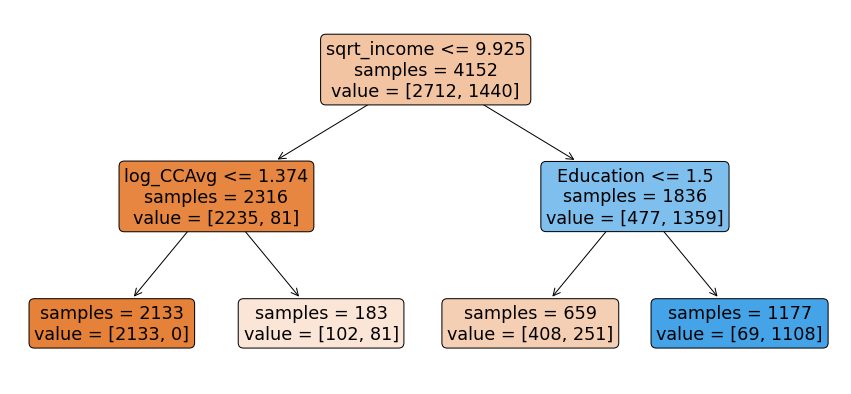

In [ ]:
# Plotting the tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree , filled = True , rounded = True , impurity = False  , feature_names = list(X.columns))
print(export_text(Dtree , feature_names = list(X.columns)))
plt.show()

In [ ]:
# Finding the accuracy of the model
predict = Dtree.predict(X)

cm = confusion_matrix(y,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model = " , accuracy)

[[2643   69]
 [ 332 1108]]
Accuracy of the decision tree model =  0.9034200385356455


**Updated Sensitivity And Specificity**

In [ ]:
# Predicting the if a person takes personal loan or not using logistic fit.
# Predicting the if a person takes personal loan or not using logistic fit.
prediction_probability = logistic.predict_proba(X)


threshold = 0.5
predict = [0 if x < threshold else 1 for x in list(prediction_probability[: , 1])]
predict[0:10]


cm = confusion_matrix(y,predict)
print("Confusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / (total)
print("Overall accuracy = " , accuracy)

sensitivity = (cm[0,0]) / total
print("Sensitivity = " , sensitivity)

specificity = cm[1,1] / (total)
print("Specificty = " , specificity)

Confusion matrix = 
 [[2519  193]
 [ 230 1210]]
Overall accuracy =  0.898121387283237
Sensitivity =  0.6066955684007708
Specificty =  0.29142581888246627


**Updated Precision, Recall and F1 Score**

In [ ]:
 # Calculating precision, recall and F1 score
threshold1 = 0.5
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

Precision_class0 = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print("Precision of class 0 = " , Precision_class0)

Precision_class1 = cm1[1,1] / (cm1[0,1] + cm1[1,1])
print("Precision of class 1 = " , Precision_class1)

Recall_class0 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print("Recall of class 0 = " , Recall_class0)

Recall_class1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print("Recall of class 1 = " , Recall_class1)


F1_Class1 = 2 / ((1/Precision_class1) + (1 / Recall_class1))
print("F1 Score of class 1 = " , F1_Class1)


Confusion matrix = 
 [[2519  193]
 [ 230 1210]]
Overall accuracy =  0.898121387283237
Precision of class 0 =  0.9163332120771189
Precision of class 1 =  0.8624376336421953
Recall of class 0 =  0.928834808259587
Recall of class 1 =  0.8402777777777778
F1 Score of class 1 =  0.8512135068589518


### K Fold Data Validation

In [ ]:
X = data_balanced.drop(["Personal_Loan"] , axis = 1)
y = data_balanced["Personal_Loan"]

Dtree = DecisionTreeClassifier(max_depth = 2)

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(Dtree,X, y,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.97115385 0.96394231 0.98313253 0.96385542 0.9686747  0.96385542
 0.87228916 0.73253012 0.78554217 0.80240964]
Avg K-Fold Accuracy 0.900738531047266


## Random Forest


In [ ]:
X = data_balanced.drop(["Personal_Loan"] , axis = 1)
y = data_balanced["Personal_Loan"]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.8)
X_train.shape

(3321, 11)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=200, max_features=4, max_depth=6)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=200)

In [ ]:
# predicting on train data
Forest_predict_train=forest.predict(X_train)

# predicting on test data
Forest_predict_test=forest.predict(X_test)

#Train Data Validation
cm1 = confusion_matrix(y_train , Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree)

#Test Data Validation
cm2 = confusion_matrix(y_test , Forest_predict_test)
print("Confusion Matrix for test data \n", cm2)
total1=sum(sum(cm2))
accuracy_tree=(cm2[0,0]+cm2[1,1])/total1
print("Accuracy of test data \n", accuracy_tree)

Confusion Matrix for Train data 
 [[2136   20]
 [  18 1147]]
Accuracy of Train data 
 0.9885576633544113
Confusion Matrix for test data 
 [[545  11]
 [ 10 265]]
Accuracy of test data 
 0.9747292418772563


## Boosting


### Gradient Boosting Model(GBM)

In [ ]:
X = data_balanced.drop(["Personal_Loan"] , axis = 1)
y = data_balanced["Personal_Loan"]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.8)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
# Building the GBM
boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, verbose=1) 

##fitting the gradient boost classifier
start_time = time.time()
boost.fit(X_train,y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.1213            0.61s
         2           0.9902            0.61s
         3           0.8831            0.63s
         4           0.7951            0.61s
         5           0.7193            0.62s
         6           0.6555            0.69s
         7           0.5995            0.67s
         8           0.5517            0.65s
         9           0.5105            0.64s
        10           0.4728            0.63s
        20           0.2639            0.53s
        30           0.1809            0.46s
        40           0.1445            0.47s
        50           0.1246            0.40s
        60           0.1067            0.32s
        70           0.0935            0.23s
        80           0.0822            0.15s
        90           0.0738            0.07s
       100           0.0677            0.00s
Time taken by GBM 0.7334761619567871 Seconds


In [ ]:
#predicting Gradient boosting model on the train Data
boost_predict_train=boost.predict(X_train)
cm1 = confusion_matrix(y_train,boost_predict_train)
print(cm1)

total = sum(sum(cm1))
from sklearn.metrics import f1_score
accuracy_train=f1_score(y_train, boost_predict_train, average='micro') 
print("train accuracy", accuracy_train)

[[2160   18]
 [  14 1129]]
train accuracy 0.9903643480879253


In [ ]:
###predicting Gradient boosting model on the test Data
boost_predict_test=boost.predict(X_test)
cm1 = confusion_matrix(y_test,boost_predict_test)
print(cm1)

accuracy_test=f1_score(y_test, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)

[[526   8]
 [  6 291]]
test accuracy 0.9831528279181708


### XGB Model